# Classification Algorithms

In [87]:
"""https://scikit-learn.org/stable/model_selection.html
"""

#   packages
import gc
gc.collect()
import os

import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split

## Vectorizers
from sklearn.feature_extraction.text import TfidfVectorizer

## Classifiers
##> Logistic Regression
from sklearn.linear_model import LogisticRegression
##> Naive Bayes
from sklearn.naive_bayes import ComplementNB

## prediction score
from sklearn.metrics import accuracy_score

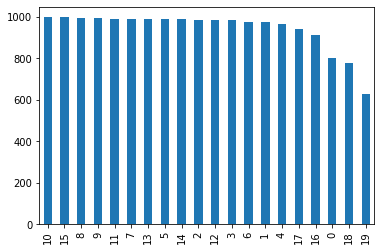

In [88]:
preProcDF_20ng = pd.read_pickle(os.path.join("data", "preProc_all_20_newsgroup.pkl"))

fig=preProcDF_20ng.target.value_counts().plot(kind='bar')
labelFig=fig.get_figure()

In [89]:
preProcDF_20ng[["title", "target"]].groupby(["title", "target"]).size()

title                     target
alt.atheism               0         799
comp.graphics             1         973
comp.os.ms-windows.misc   2         985
comp.sys.ibm.pc.hardware  3         982
comp.sys.mac.hardware     4         963
comp.windows.x            5         988
misc.forsale              6         975
rec.autos                 7         990
rec.motorcycles           8         996
rec.sport.baseball        9         994
rec.sport.hockey          10        999
sci.crypt                 11        991
sci.electronics           12        984
sci.med                   13        990
sci.space                 14        987
soc.religion.christian    15        997
talk.politics.guns        16        910
talk.politics.mideast     17        940
talk.politics.misc        18        775
talk.religion.misc        19        628
dtype: int64

In [90]:
"""
comp.graphics             1         973
comp.os.ms-windows.misc   2         985
comp.sys.ibm.pc.hardware  3         982
comp.sys.mac.hardware     4         963
comp.windows.x            5         988

rec.autos                 7         990
rec.motorcycles           8         996
rec.sport.baseball        9         994
rec.sport.hockey          10        999

sci.crypt                 11        991
sci.electronics           12        984
sci.med                   13        990
sci.space                 14        987

talk.politics.guns        16        910
talk.politics.mideast     17        940
talk.politics.misc        18        775
talk.religion.misc        19        628
"""

preProcDF_20ng["Label"] = np.nan
preProcDF_20ng["Label"][preProcDF_20ng.target.isin([1, 2, 3, 4, 5])]="COMP"
preProcDF_20ng["Label"][preProcDF_20ng.target.isin([7, 8, 9, 10])]="REC"
preProcDF_20ng["Label"][preProcDF_20ng.target.isin([11, 12, 13, 14])]="SCI"
preProcDF_20ng["Label"][preProcDF_20ng.target.isin([16, 17, 18, 19])]="TALK"

<ipython-input-90-724de34a79ca>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  preProcDF_20ng["Label"][preProcDF_20ng.target.isin([1, 2, 3, 4, 5])]="COMP"


<ipython-input-115-baba19c85622>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filteredDF["len"] = list(filteredDF.tokens.str.len())


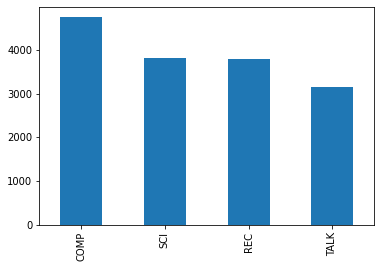

In [115]:
filteredDF = preProcDF_20ng.loc[preProcDF_20ng.Label.isin(["COMP", "REC", "SCI", "TALK"])]

filteredDF["len"] = list(filteredDF.tokens.str.len())

filteredDF = filteredDF[filteredDF.len>0]

fig=filteredDF.Label.value_counts().plot(kind='bar')
labelFig=fig.get_figure()

In [92]:
filteredDF.head(5)

,text,target,title,date,tokens,preProc,Label,len
0,\n\nI am sure some bashers of Pens fans are pr...,10,rec.sport.hockey,2022-02-02 14:49:56.537861,"[sure, basher, fan, pretty, confused, lack, ki...",sure basher fan pretty confused lack kind post...,REC,60
7,"\n[stuff deleted]\n\nOk, here's the solution t...",10,rec.sport.hockey,2022-02-02 14:49:56.537861,"[stuff, delete, solution, problem, move, yeste...",stuff delete solution problem move yesterday a...,REC,51
8,"\n\n\nYeah, it's the second one. And I believ...",10,rec.sport.hockey,2022-02-02 14:49:56.537861,"[second, believe, price, try, get, good, look,...",second believe price try get good look telecas...,REC,20
24,I don't know the exact coverage in the states....,10,rec.sport.hockey,2022-02-02 14:49:56.537861,"[not, know, exact, coverage, state, cover, may...",not know exact coverage state cover maybe grab...,REC,65
44,Here are the NHL's alltime leaders in goals an...,10,rec.sport.hockey,2022-02-02 14:49:56.537861,"[alltime, leader, goal, point, end, season, mu...",alltime leader goal point end season much than...,REC,50


In [93]:
labels = filteredDF.Label.tolist()
category_list = filteredDF.Label.unique()

tfidf_vectorizer = TfidfVectorizer()
X_tfidf_20ng = tfidf_vectorizer.fit_transform(filteredDF.preProc).toarray()

X_tfidf_train_20ng, X_tfidf_test_20ng, y_tfidf_train_20ng, y_tfidf_test_20ng = train_test_split(X_tfidf_20ng, labels, train_size=0.85, stratify=labels, random_state=1)

In [94]:
LR_model = LogisticRegression(solver='liblinear', C=10.0, random_state=0).fit(X_tfidf_train_20ng, y_tfidf_train_20ng)
y_tfidf_test_pred_20ng = LR_model.predict(X_tfidf_test_20ng)

print("Accuracy:", accuracy_score(y_tfidf_test_20ng, y_tfidf_test_pred_20ng))

Accuracy: 0.8592274678111588


In [95]:
y_tfidf_score_20ng = LR_model.decision_function(X_tfidf_test_20ng)
y_tfidf_score_20ng

array([[ 6.77129314, -7.78911552, -5.04413208, -9.57310422],
       [-4.68853004, -5.74959897, -3.2834177 ,  2.76293617],
       [-2.80078567,  0.36767354, -2.80150721, -2.59941174],
       ...,
       [-6.88211248, -0.13281891, -4.27100846,  1.37276945],
       [ 3.04282143, -5.13746645, -5.7131247 , -1.81312366],
       [-2.90113655, -1.02458319, -2.67377105, -0.52073558]])

In [96]:
y_tfidf_proba_20ng = LR_model.predict_proba(X_tfidf_test_20ng)
y_tfidf_proba_20ng

array([[9.93149977e-01, 4.11682683e-04, 6.36916773e-03, 6.91728699e-05],
       [9.21702847e-03, 3.20901134e-03, 3.65437187e-02, 9.51030242e-01],
       [7.39503209e-02, 7.62843535e-01, 7.39000356e-02, 8.93061089e-02],
       ...,
       [8.01051772e-04, 3.64872545e-01, 1.07663844e-02, 6.23560018e-01],
       [8.64665411e-01, 5.28894187e-03, 2.98177400e-03, 1.27063874e-01],
       [6.91449424e-02, 3.50567184e-01, 8.56576218e-02, 4.94630252e-01]])

In [97]:
from sklearn.metrics import accuracy_score

print(accuracy_score(y_tfidf_test_20ng, y_tfidf_test_pred_20ng))
print(accuracy_score(y_tfidf_test_20ng, y_tfidf_test_pred_20ng, normalize=False))

0.8592274678111588
2002


In [98]:
from sklearn.metrics import top_k_accuracy_score

print(top_k_accuracy_score(y_tfidf_test_20ng, y_tfidf_score_20ng, k=2))
print(top_k_accuracy_score(y_tfidf_test_20ng, y_tfidf_proba_20ng, k=2))

0.9515021459227467
0.9515021459227467


In [99]:
from sklearn.metrics import balanced_accuracy_score

print(balanced_accuracy_score(y_tfidf_test_20ng, y_tfidf_test_pred_20ng))

0.8584380669633894


In [100]:
from sklearn.metrics import cohen_kappa_score

print(cohen_kappa_score(y_tfidf_test_20ng, y_tfidf_test_pred_20ng))

0.810928745985353


In [101]:
from sklearn.metrics import hamming_loss

hamming_loss(y_tfidf_test_20ng, y_tfidf_test_pred_20ng)

0.1407725321888412

In [102]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_tfidf_test_20ng, y_tfidf_test_pred_20ng
                        #, normalize='all'
                        )
cm

array([[630,  23,  57,   3],
       [ 24, 490,  30,  27],
       [ 50,  28, 468,  27],
       [ 10,  21,  28, 414]], dtype=int64)

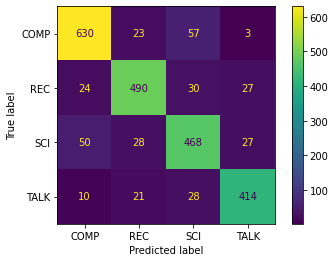

In [103]:
import matplotlib.pyplot as plt
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=LR_model.classes_)
disp.plot()

plt.show()

In [104]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

print(precision_score(y_tfidf_test_20ng, y_tfidf_test_pred_20ng, average='macro'))
print(precision_score(y_tfidf_test_20ng, y_tfidf_test_pred_20ng, average='micro'))
print(precision_score(y_tfidf_test_20ng, y_tfidf_test_pred_20ng, average='weighted'))
print(precision_score(y_tfidf_test_20ng, y_tfidf_test_pred_20ng, average=None))

print(recall_score(y_tfidf_test_20ng, y_tfidf_test_pred_20ng, average='macro'))
print(recall_score(y_tfidf_test_20ng, y_tfidf_test_pred_20ng, average='micro'))
print(recall_score(y_tfidf_test_20ng, y_tfidf_test_pred_20ng, average='weighted'))
print(recall_score(y_tfidf_test_20ng, y_tfidf_test_pred_20ng, average=None))

0.858991094819648
0.8592274678111588
0.8595258110203311
[0.88235294 0.87188612 0.80274443 0.87898089]
0.8584380669633894
0.8592274678111588
0.8592274678111588
[0.88359046 0.85814361 0.81675393 0.87526427]


In [105]:
from sklearn.metrics import classification_report

print(classification_report(y_tfidf_test_20ng, y_tfidf_test_pred_20ng, target_names=LR_model.classes_))

              precision    recall  f1-score   support

        COMP       0.88      0.88      0.88       713
         REC       0.87      0.86      0.86       571
         SCI       0.80      0.82      0.81       573
        TALK       0.88      0.88      0.88       473

    accuracy                           0.86      2330
   macro avg       0.86      0.86      0.86      2330
weighted avg       0.86      0.86      0.86      2330



In [106]:
from sklearn.metrics import f1_score

print(f1_score(y_tfidf_test_20ng, y_tfidf_test_pred_20ng, average='macro'))
print(f1_score(y_tfidf_test_20ng, y_tfidf_test_pred_20ng, average='micro'))
print(f1_score(y_tfidf_test_20ng, y_tfidf_test_pred_20ng, average='weighted'))
print(f1_score(y_tfidf_test_20ng, y_tfidf_test_pred_20ng, average=None))

0.8586846940534802
0.8592274678111588
0.8593474297743596
[0.88297127 0.86496028 0.80968858 0.87711864]


In [107]:
from sklearn.metrics import fbeta_score

print(fbeta_score(y_tfidf_test_20ng, y_tfidf_test_pred_20ng, average='macro', beta=0.5))
print(fbeta_score(y_tfidf_test_20ng, y_tfidf_test_pred_20ng, average='micro', beta=0.5))
print(fbeta_score(y_tfidf_test_20ng, y_tfidf_test_pred_20ng, average='weighted', beta=0.5))
print(fbeta_score(y_tfidf_test_20ng, y_tfidf_test_pred_20ng, average=None, beta=0.5))

0.8588613691382199
0.8592274678111588
0.8594474558406615
[0.88260017 0.86910252 0.80550775 0.87823504]


OneVsRestClassifier

In [108]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import label_binarize

import matplotlib.pyplot as plt

n_classes = len(category_list.tolist())
y = label_binarize(labels, classes=category_list.tolist())

# shuffle and split training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_tfidf_20ng, y, train_size=0.85, random_state=0)

clf = OneVsRestClassifier(LogisticRegression(solver='liblinear', C=10.0, random_state=0))

clf_fitted = clf.fit(X_train, y_train)

y_test_pred = clf_fitted.predict(X_test)

y_proba = clf_fitted.predict_proba(X_test)

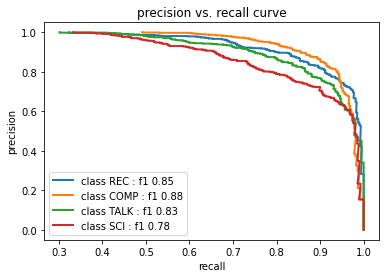

In [109]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score

# precision recall curve
precision = dict()
recall = dict()
lr_f1 = dict()
for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(y_test[:, i],
                                                        y_proba[:, i])
    lr_f1[i] = f1_score(y_test[:, i], y_test_pred[:, i])
    cls = category_list.tolist()[i]
    plt.plot(precision[i], recall[i], lw=2, label=f'class {cls} : f1 {round(lr_f1[i], 2)}')
    
plt.xlabel("recall")
plt.ylabel("precision")
plt.legend(loc="best")
plt.title("precision vs. recall curve")
plt.show()

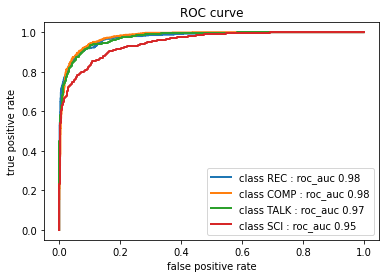

In [110]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# roc curve
fpr = dict()
tpr = dict()
lr_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i],
                                  y_proba[:, i])
    lr_auc[i] = roc_auc_score(y_test[:, i], y_proba[:, i])
    cls = category_list.tolist()[i]
    plt.plot(fpr[i], tpr[i], lw=2, label=f'class {cls} : roc_auc {round(lr_auc[i], 2)}')

plt.xlabel("false positive rate")
plt.ylabel("true positive rate")
plt.legend(loc="best")
plt.title("ROC curve")
plt.show()